In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SAT=pd.read_csv("SAT_Results.csv")
SAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DBN                  421 non-null    object
 1   SCHOOL NAME          421 non-null    object
 2   Num_SAT_test_takers  421 non-null    int64 
 3   Crit_Reading         421 non-null    int64 
 4   Math                 421 non-null    int64 
 5   Writing              421 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 19.9+ KB


In [3]:
SAT.head()

,DBN,SCHOOL NAME,Num_SAT_test_takers,Crit_Reading,Math,Writing
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


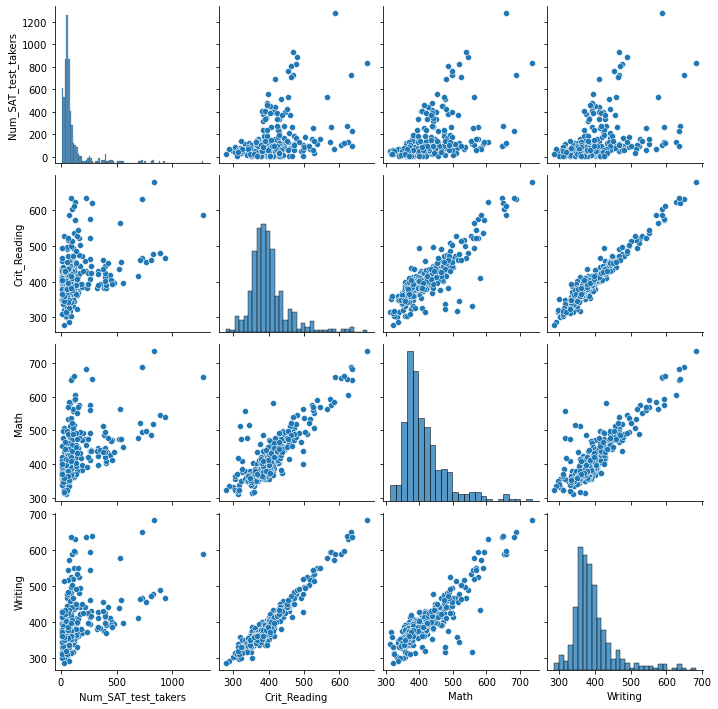

In [4]:
import seaborn as sns
sns.pairplot(SAT)

In [5]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [6]:
x=SAT["Writing"]
y=SAT["Crit_Reading"]

In [7]:
model=linear_model.LinearRegression()
model.fit(x,y)
ypred_all=model.predict(x)

ValueError: Expected 2D array, got 1D array instead:
array=[363 366 370 359 384 316 525 411 628 387 392 378 362 432 416 340 385 405
 390 384 394 479 357 461 467 523 518 550 515 459 592 533 381 428 391 349
 458 368 388 391 360 682 442 351 475 393 400 420 344 382 335 431 352 384
 477 512 345 343 403 429 411 426 390 359 376 430 403 408 374 370 381 370
 358 592 577 402 411 351 467 361 373 455 376 395 448 357 345 333 398 342
 364 385 442 404 355 588 416 367 399 346 378 349 361 402 423 326 348 382
 311 357 371 404 411 391 363 361 383 407 364 370 364 378 389 394 340 375
 350 376 393 413 365 356 377 368 399 376 349 374 357 415 382 356 457 356
 367 376 391 297 339 351 351 402 379 402 369 388 371 440 365 394 382 370
 302 385 301 383 387 330 365 400 372 367 352 410 427 649 339 414 354 364
 356 317 636 382 390 367 361 354 433 383 391 353 416 368 335 363 375 419
 365 382 354 341 360 360 411 358 364 298 349 398 312 341 362 376 349 373
 418 356 384 395 587 312 389 368 403 379 394 431 392 448 413 359 381 570
 396 371 395 396 350 364 380 355 350 368 341 383 387 394 381 380 392 385
 300 368 411 425 358 362 358 351 369 351 334 291 388 359 372 340 368 441
 369 414 373 373 335 479 413 355 330 394 377 346 379 351 359 386 381 393
 370 367 374 378 394 333 342 383 370 286 380 354 363 368 363 374 399 424
 411 375 316 314 408 378 393 467 390 365 356 376 435 373 476 439 370 542
 440 387 359 331 311 332 388 421 400 407 311 550 380 396 385 329 380 440
 406 423 443 318 392 481 395 382 344 638 388 441 377 489 467 384 464 420
 373 401 364 416 348 496 360 354 368 392 425 400 367 425 454 353 386 442
 502 596 384 432 359 375 402 424 363 394 377 359 377 405 412 395 494 398
 329 491 544 450 385 466 416 417 429 470 459 414 397 636 370 352 361 334
 354 422 350 358 433 426 360].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
x.shape

(421,)

In [9]:
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [10]:
x.shape

(421, 1)

In [11]:
model=linear_model.LinearRegression()
model.fit(x,y)
ypred_all=model.predict(x)

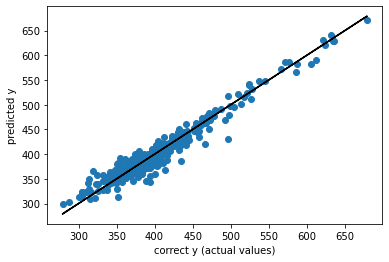

In [12]:
plt.scatter(y,ypred_all)
plt.plot(y,y,c='k')
plt.xlabel("correct y (actual values)")
plt.ylabel("predicted y")
plt.show()

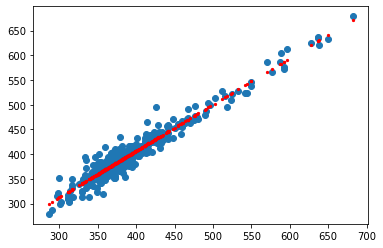

In [13]:
plt.scatter(x,y)
plt.scatter(x,ypred_all,c='r',s=5)
 
plt.show()

In [14]:
metrics.r2_score(y,ypred_all)

0.9415636447787411

In [15]:
model.coef_

array([[0.94001918]])

In [16]:
model.intercept_

array([30.49619448])

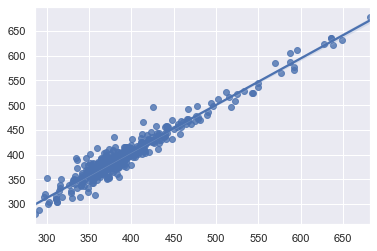

In [17]:
sns.set_theme()
sns.regplot(x=x,y=y);

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25)

model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)

In [25]:
metrics.r2_score(ytest,ypred_test)
#repeat with a different split

0.9342135351298753

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
model=linear_model.LinearRegression()
cve=cross_val_score(model,x,y,cv=10)
#we use the whole data

In [28]:
print(cve)

[0.96212927 0.92089979 0.887618   0.85152801 0.96672495 0.91351968
 0.80243475 0.96234115 0.95104306 0.93398792]


In [29]:
np.mean(cve)    #error for method: linear regression

0.9152226589224843

In [30]:
od=pd.read_csv("olympics_athlete_events.csv")

In [31]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [32]:
od.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
1,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
2,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
3,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
4,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN


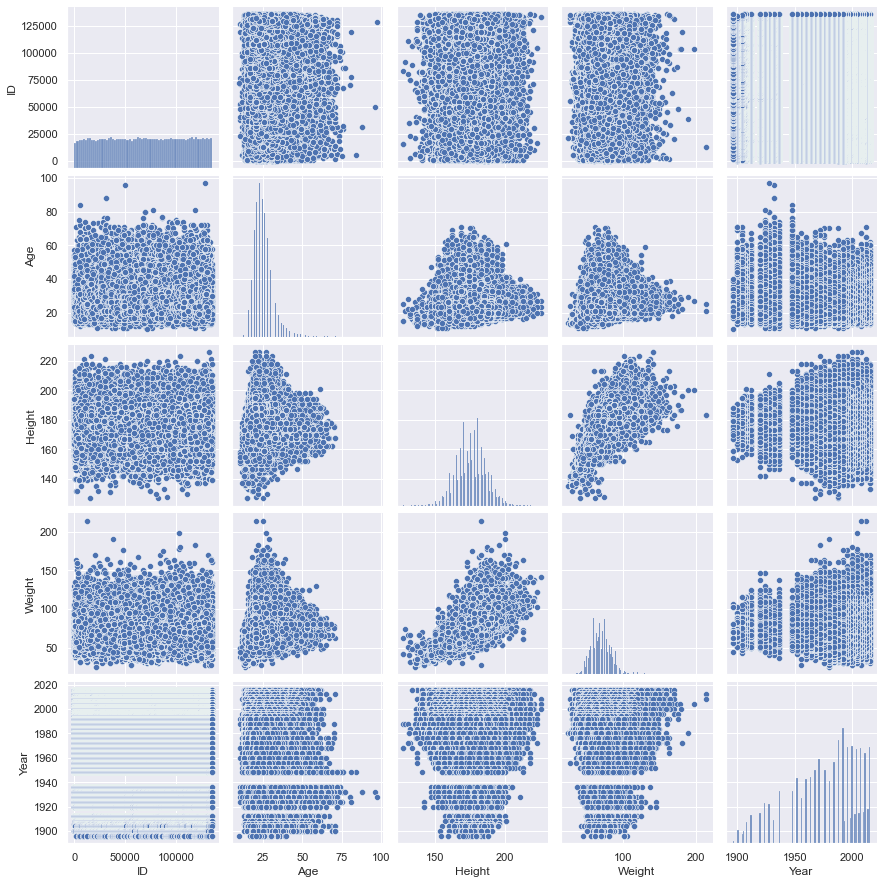

In [33]:
sns.pairplot(od)


In [34]:
x=od["Height"].values.reshape(-1,1)
y=od["Weight"].values.reshape(-1,1)

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25)

model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [53]:
od2=od.dropna(subset=["Height","Weight"])

x=od2["Height"].values.reshape(-1,1)
y=od2["Weight"].values.reshape(-1,1)


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25)

model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)

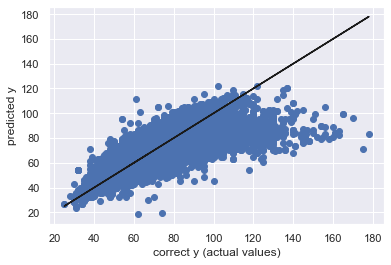

In [37]:
plt.scatter(ytest,ypred_test)
plt.plot(ytest,ytest,c='k')
plt.xlabel("correct y (actual values)")
plt.ylabel("predicted y")
plt.show()

In [54]:
metrics.r2_score(ytest,ypred_test)

0.6313474988408749

<AxesSubplot:>

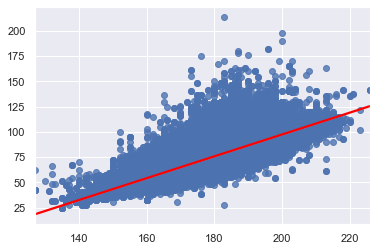

In [43]:
sns.regplot(x=xtrain,y=ytrain,line_kws={"color":"red"})

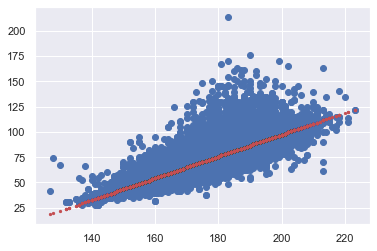

In [44]:

plt.scatter(xtest,ytest)
plt.scatter(xtest,ypred_test,c='r',s=5)
 
plt.show()

In [45]:
model.coef_
#what is the interpretation of this coefficient?

array([[1.08141144]])

In [46]:
model.intercept_
#write the linear relationship between height and weight

array([-118.96193027])

In [47]:
from sklearn.preprocessing import PolynomialFeatures
#will be able to capture the trend better with quadratic terms?

In [48]:
poly=PolynomialFeatures(degree=2)
xnew=poly.fit_transform(x)
#transforms x to [x^0, x^1, x^2]

- if we use linear regression on x:
    
f(x)=w0+w1*x=w0*x^0+w1*x^1

- if we add quadratic terms, we add x^2 as a new feature:

x_new=[x^0, x^1, x^2]

g(x)=w0*x^0+w1*x^1+w2*x^2

In [50]:
x

array([[170.],
       [167.],
       [167.],
       ...,
       [159.],
       [159.],
       [159.]])

In [49]:
xnew

array([[1.0000e+00, 1.7000e+02, 2.8900e+04],
       [1.0000e+00, 1.6700e+02, 2.7889e+04],
       [1.0000e+00, 1.6700e+02, 2.7889e+04],
       ...,
       [1.0000e+00, 1.5900e+02, 2.5281e+04],
       [1.0000e+00, 1.5900e+02, 2.5281e+04],
       [1.0000e+00, 1.5900e+02, 2.5281e+04]])

In [55]:

xtrain,xtest,ytrain,ytest=train_test_split(xnew,y,test_size=.25)

model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)

In [56]:
metrics.r2_score(ytest,ypred_test)
#any improvements?

0.6327422263876871

In [57]:
xtest

array([[1.0000e+00, 1.7000e+02, 2.8900e+04],
       [1.0000e+00, 1.6400e+02, 2.6896e+04],
       [1.0000e+00, 1.6600e+02, 2.7556e+04],
       ...,
       [1.0000e+00, 1.7100e+02, 2.9241e+04],
       [1.0000e+00, 1.9600e+02, 3.8416e+04],
       [1.0000e+00, 1.7300e+02, 2.9929e+04]])

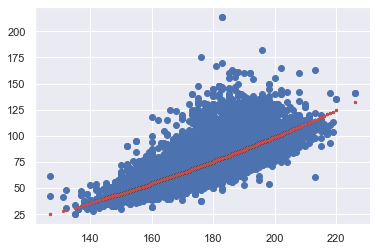

In [58]:
#we only need column1
plt.scatter(xtest[:,1],ytest)
plt.scatter(xtest[:,1],ypred_test,c='r',s=5)
 
plt.show()

In [59]:
model.coef_

array([[0.        , 0.06491281, 0.00290092]])

In [60]:
md=pd.read_csv("marathon_results_2017.csv")
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           26410 non-null  object 
 1   Age            26410 non-null  int64  
 2   M/F            26410 non-null  object 
 3   City           26410 non-null  object 
 4   State          22815 non-null  object 
 5   Country        26410 non-null  object 
 6   5K             26410 non-null  int64  
 7   10K            26410 non-null  int64  
 8   15K            26410 non-null  int64  
 9   20K            26410 non-null  int64  
 10  Half           26410 non-null  int64  
 11  25K            26410 non-null  int64  
 12  30K            26410 non-null  int64  
 13  35K            26410 non-null  int64  
 14  40K            26410 non-null  int64  
 15  Official Time  26410 non-null  int64  
 16  speed (km/h)   26410 non-null  float64
 17  speed (mph)    26410 non-null  float64
dtypes: flo

In [61]:
#can we predict speed based on age?

md2=md.dropna(subset=["Age","speed (km/h)"])
x=md2["Age"].values.reshape(-1,1)
y=md2["speed (km/h)"].values.reshape(-1,1)

In [63]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25)

model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)

metrics.r2_score(ytest,ypred_test)
#repeat it 

0.0630668562734017

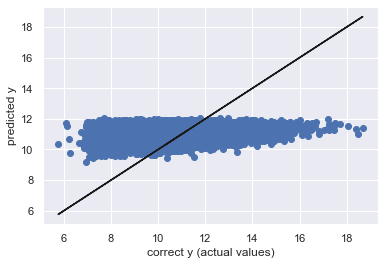

In [64]:
 plt.scatter(ytest,ypred_test)
plt.plot(ytest,ytest,c='k')
plt.xlabel("correct y (actual values)")
plt.ylabel("predicted y")
plt.show()
#predicted y is always in the range 10, 12

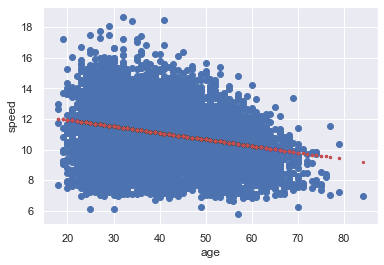

In [66]:

plt.scatter(xtest,ytest)
plt.scatter(xtest,ypred_test,c='r',s=5)
plt.xlabel('age')
plt.ylabel('speed')
plt.show()

- there is a lot of variation in speed for each age value. So line cannot capture the trend well.

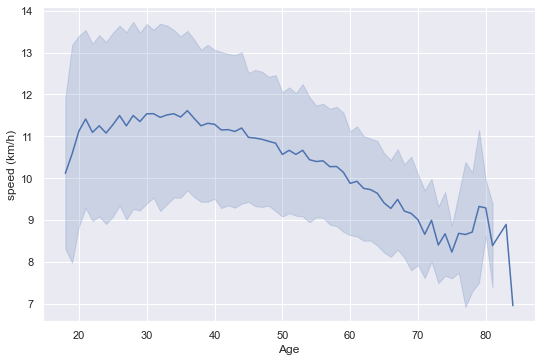

In [69]:
#ci is the confidence interval
#average and sd of speed for each age
#it does not show the number of points
sns.relplot(data=md2,x="Age",y="speed (km/h)",kind="line",aspect=1.5,ci="sd");

In [76]:
poly=PolynomialFeatures(degree=2)
xnew=poly.fit_transform(x)


xtrain,xtest,ytrain,ytest=train_test_split(xnew,y,test_size=.25)

model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)

metrics.r2_score(ytest,ypred_test)

0.08656922420237989

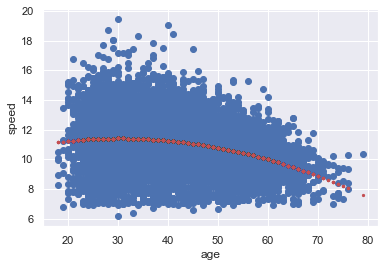

In [75]:

plt.scatter(xtest[:,1],ytest)
plt.scatter(xtest[:,1],ypred_test,c='r',s=5)
plt.xlabel('age')
plt.ylabel('speed')
plt.show()

- how to compare linear and quadtaric model?

In [79]:
model=linear_model.LinearRegression()
cve=cross_val_score(model,x,y,cv=10,scoring="neg_mean_squared_error")
print(cve)

[-13.84132605  -4.19395898  -1.69100685  -0.70570015  -0.29571491
  -0.27730378  -0.69646635  -1.81510646  -4.80463263 -12.14816291]


In [80]:
np.mean(cve)

-4.046937907164109

In [81]:
model=linear_model.LinearRegression()
cve=cross_val_score(model,xnew,y,cv=10,scoring="neg_mean_squared_error")
print(cve)

[-14.01261174  -3.99122393  -1.54757826  -0.63528492  -0.29001067
  -0.33261291  -0.81844185  -1.88982317  -4.63805767 -11.82293885]


In [82]:
np.mean(cve)

-3.9978583969598196

In [83]:
errors=[]
vrs=[]

for degree in range(10):
    poly=PolynomialFeatures(degree=degree)
    xnew=poly.fit_transform(x)
    model=linear_model.LinearRegression()
    cve=cross_val_score(model,xnew,y,cv=20,scoring="neg_mean_squared_error")
    errors.append(cve.mean())
    vrs.append(cve.std())

    
    

In [84]:
errors

[-3.841013321486014,
 -3.620321904690966,
 -3.56705887671039,
 -3.568230698380617,
 -3.571256205327419,
 -3.5721677767823707,
 -3.5719972404642277,
 -3.572286659992301,
 -3.571897966445462,
 -3.5716992530909915]

In [85]:
vrs

[4.974128817883221,
 4.5276177942853115,
 4.5147321794831425,
 4.507357795403382,
 4.511533487865363,
 4.511860281816417,
 4.511803675511579,
 4.511773492820389,
 4.5110790958603175,
 4.5111070169989365]

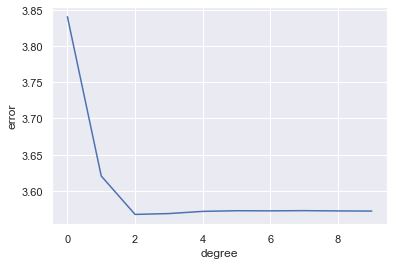

In [87]:

plt.plot(range(10),np.negative(errors))
plt.xlabel('degree')
plt.ylabel('error');


### model selection


- which degree (which model) is the best?

#### parameter vs hyper parameter

- parameters are learned. 

- hyper-parameters are chosen.

### House appraisal model

In [88]:
from sklearn.datasets import load_boston

In [89]:
bh=load_boston()

In [90]:
x=bh.data  #features
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [91]:
y=bh.target   #outcome variable 
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [92]:
bds=pd.DataFrame(bh.data,columns=bh.feature_names)
bds["price"]=bh.target  #add the target variabe manually
bds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [93]:
print(bh.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [99]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25)

model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)

metrics.r2_score(ytest,ypred_test)

0.699766301359424

In [100]:
xtrain.shape

(379, 13)

In [101]:
ytrain.shape

(379,)

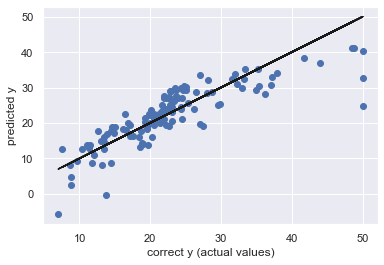

In [102]:
#we can use this plot, regardless of the dimensionality of our data

plt.scatter(ytest,ypred_test)
plt.plot(ytest,ytest,c='k')
plt.xlabel("correct y (actual values)")
plt.ylabel("predicted y")
plt.show()

In [103]:
c=model.coef_
c

array([-1.22458223e-01,  3.48454635e-02,  5.16262348e-02,  2.63538579e+00,
       -1.78185741e+01,  3.70297076e+00,  2.41816738e-03, -1.41771734e+00,
        2.88296677e-01, -1.22085523e-02, -1.01922785e+00,  9.21220532e-03,
       -5.63919450e-01])

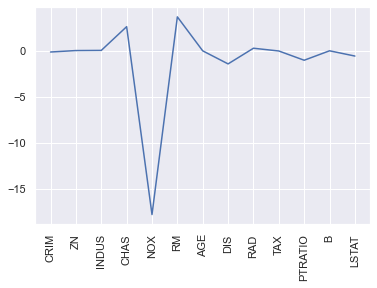

In [104]:
plt.plot(bh.feature_names,c)
plt.xticks(rotation = 90);



- What if we only used a subset of feature?

In [108]:
xnew=x[:,[0,1,10]]

xtrain,xtest,ytrain,ytest=train_test_split(xnew,y,test_size=.25)

model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)

metrics.r2_score(ytest,ypred_test)

0.1252978771658182

### Lasso

In [112]:
 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25)

model_l=linear_model.Lasso(alpha=0.1,normalize=True)
model_l.fit(xtrain,ytrain)
ypred_test=model_l.predict(xtest)

metrics.r2_score(ytest,ypred_test)

0.5509639297076865

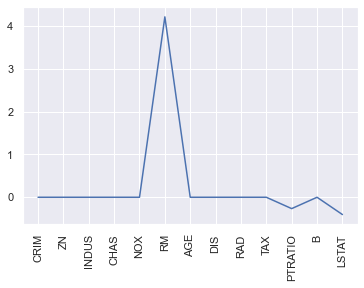

In [113]:
c_l=model_l.coef_
plt.plot(bh.feature_names,c_l)
plt.xticks(rotation = 90);
#how many features have non-zero coefficients?

### Ridge

In [119]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25)

model_r=linear_model.Ridge(alpha=.1,normalize=True)
model_r.fit(xtrain,ytrain)
ypred_test=model_r.predict(xtest)

metrics.r2_score(ytest,ypred_test)

0.8224622741489929

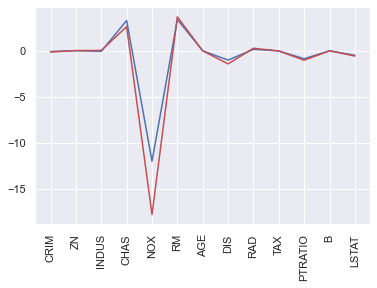

In [120]:
#compare with OLS. 
c_r=model_r.coef_
plt.plot(bh.feature_names,c_r)
plt.plot(bh.feature_names,c,c='r')
plt.xticks(rotation = 90);

In [123]:
# Changing the hyperparameter
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25)

model_r2=linear_model.Ridge(alpha=10,normalize=True)
model_r2.fit(xtrain,ytrain)
ypred_test=model_r2.predict(xtest)

metrics.r2_score(ytest,ypred_test)

0.2752481049827671

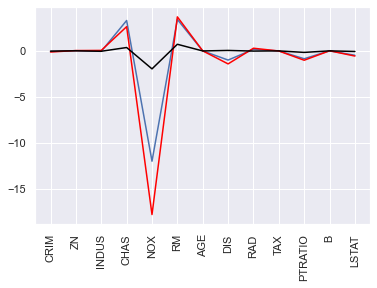

In [124]:
c_r2=model_r2.coef_
plt.plot(bh.feature_names,c_r)
plt.plot(bh.feature_names,c,c='red')
plt.plot(bh.feature_names,c_r2,c='black')
plt.xticks(rotation=90);

#### Model selction

- Using cross-validation to choose alpha

In [126]:
our_alphas=[0.001,.01,.1,1,5,10,50,100,500,1000,5000,10000]

In [127]:
model=linear_model.RidgeCV(alphas=our_alphas,store_cv_values=True,normalize=True)
model.fit(x,y);

In [128]:
model.cv_values_

array([[ 37.45054844,  38.56241633,  39.82167591, ...,   2.06439322,
          2.14156846,   2.1513632 ],
       [ 11.98982507,  11.92688777,  12.05116845, ...,   0.91049932,
          0.88093731,   0.87725566],
       [ 17.48016596,  17.42718034,  18.01810886, ..., 147.81886961,
        148.46488017, 148.54612572],
       ...,
       [ 14.63814577,  14.60320121,  12.93388384, ...,   1.85086233,
          1.87144709,   1.87403612],
       [ 17.86915647,  17.93283103,  17.0230091 , ...,   0.29288084,
          0.28657858,   0.28579303],
       [113.67901407, 113.49741233, 111.52976894, ..., 113.51446039,
        113.50673166, 113.50574891]])

In [129]:
model.cv_values_.shape

(506, 12)

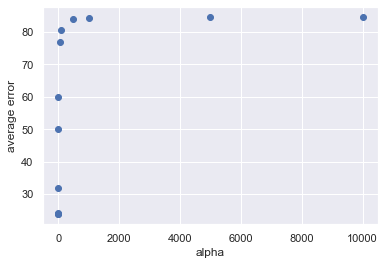

In [130]:
plt.scatter(our_alphas,np.mean(model.cv_values_,axis=0))
plt.xlabel('alpha')
plt.ylabel('average error');

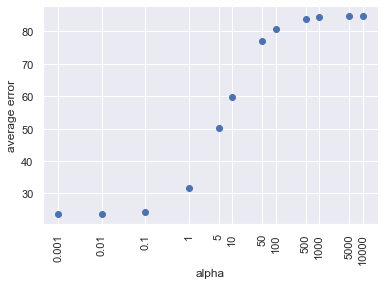

In [132]:
p=plt.scatter(np.log10(our_alphas),np.mean(model.cv_values_,axis=0))
plt.xlabel('alpha')
plt.ylabel('average error');
plt.xticks(ticks=np.log10(our_alphas),labels=our_alphas, rotation=90);

- what do you think is the best value for alpha?